In [89]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

car_front_1 = glob.glob('./Documents/data_set/Result/67_Ford_Black_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result/66_Ford_Purple_back/*_overall.csv')
motorbike_1 = glob.glob('./Documents/data_set/Result/92_CBR_Honda_side/*_overall.csv')
cycle_1 = glob.glob('./Documents/data_set/Result/Cycle_side/*_overall.csv')
human_A = glob.glob('./Documents/data_set/Result/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result/Human_C/*_overall.csv')
pillar_1 = glob.glob('./Documents/data_set/Result/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result/Pillar_2/*_overall.csv')
stopper_1 = glob.glob('./Documents/data_set/Result/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result/Stopper_2/*_overall.csv')
# ventilator_1 = glob.glob('./Documents/data_set/Result/Ventilator_1/*_overall.csv')
wall_1 = glob.glob('./Documents/data_set/Result/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result/Wall_2/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)
motorbike_1_fft = get_fft_set(motorbike_1)
cycle_1_fft = get_fft_set(cycle_1)
human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)
# ventilator_1_fft = get_fft_set(ventilator_1)
wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)

car = car_front_1_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft
pillar = pillar_1_fft + pillar_2_fft
stopper = stopper_1_fft + stopper_2_fft
# ventilator = ventilator_1_fft
wall = wall_1_fft + wall_1_fft
 
X = car + motorbike + cycle + human + pillar + stopper + wall
y = len(car)*['Car'] + len(motorbike)*['Motorbike'] + len(cycle)*['Cycle'] + len(human)*['Human'] + len(pillar)*['Pillar'] + len(stopper)*['Stopper'] + len(wall)*['Wall']

print(len(car))
print(len(motorbike))
print(len(cycle))
print(len(human))
print(len(pillar))
print(len(stopper))
# print(len(ventilator))
print(len(wall))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

11053
1268
445
1431
7816
2690
3774


In [107]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=50)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

# from sklearn.metrics import accuracy_score
print(confusion_matrix(result, y_test))
print(accuracy_score(result, y_test))

# plot_confusionMatrix(result, y_test)

[[4347   20  100   86   18   15    8]
 [   0  140    0    2    0    0    0]
 [  56   12  358    4    1   14    0]
 [   0    4    0  348    4    0    2]
 [   3   10   49   46 3062   21   16]
 [   6   10   35    5   29 1017    0]
 [   1    5    1   17   14    0 1505]]
0.9460977965060136


0.9517162672285138
[[4357   15  110   89   10   20    6]
 [   0  150    0    1    0    0    0]
 [  50   17  365    2    1    8    0]
 [   0    0    2  358    1    0    4]
 [   4    6   35   38 3084   13   20]
 [   2    8   31    8   21 1026    0]
 [   0    5    0   12   11    0 1501]]
[4607  151  443  365 3200 1096 1529]


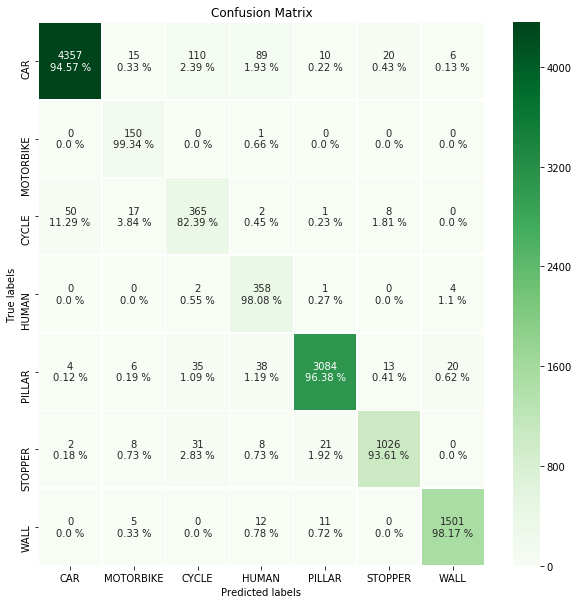

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 14, whiten='True')
pca_x = pca.fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca_x, y, test_size=0.40, random_state=42)
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)
clf = RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=50)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)
print(accuracy_score(result, y_test))

# print(confusion_matrix(result, y_test))

plot_confusionMatrix(result, y_test)

In [115]:
print(pca.explained_variance_ratio_)  

print(pca.singular_values_) 

[0.840198   0.0372507  0.03496906 0.01601896 0.01267142 0.00816833
 0.00677987 0.00540111 0.0047544  0.00382657 0.00354825 0.00318206
 0.0025758  0.00226128]
[11.76161322  2.47652824  2.39948514  1.62402698  1.44440424  1.1596924
  1.05654192  0.94301293  0.88475711  0.79374449  0.76433356  0.72381924
  0.6512261   0.61017298]


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt  

def plot_confusionMatrix(result, y_test):
    cm = confusion_matrix(result, y_test)
    print(cm)
    sum = np.sum(cm, axis=1)
    print(sum)
    
    fig, ax = plt.subplots(figsize=(10,10))

    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    counter = 0
    for i in range(0,7):
        for j in range(0,7):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']); 
    ax.yaxis.set_ticklabels(['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']);
    
#     from sklearn.metrics import classification_report
#     print(classification_report(y_test, result, ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'STOPPER', 'WALL']))